In [9]:
import pandas as pd
import scanpy as sc
import numpy as np
import sys

## change the path of your own latest version of VITAE
sys.path.append(r"C:\Users\10270\Desktop\硕一上\Wang\Trajectory\Dev\GitVersion\VITAE")
import os as os

import VITAE
from VITAE.utils import load_data

import pandas as pd
import scanpy as sc
import tensorflow as tf
import random

## change your own path of mouse_brain_merge.
dd = load_data(path = "D:/BioData/", file_name = "mouse_brain_merged")
dd.obs.columns = ['grouping', 'S_Score', 'G2M_Score', 'Source']

sc.pp.normalize_total(dd, target_sum=1e4)
sc.pp.log1p(dd)
sc.pp.highly_variable_genes(dd, min_mean=0.0125, max_mean=3, min_disp=0.5)


sc.pp.scale(dd, max_value=10)

In [10]:
## Hyper parameters
npc = 64
model_type = "Gaussian"
hidden_layers = [32,16]
latent_space_dim = 8

clustering_res = 0.6
pi_prune_ratio = 0

n_posterior_samples = 10
beta = 1

In [11]:
seed = 400
tf.keras.backend.clear_session()
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

model = VITAE.VITAE(adata = dd,
                 npc = npc, model_type = 'Gaussian',
                 hidden_layers = hidden_layers, latent_space_dim = latent_space_dim,
                 covariates = ['Source', 'S_Score', 'G2M_Score'])

In [12]:
model.load_model("../../../weight/tutorial_mouse_brain_merged/mouse.checkpoint",load_labels=True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Initial clustering labels saved as 'vitae_init_clustering' in self.adata.obs.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, 

In [27]:
import seaborn
seaborn.set(rc={'figure.figsize':(10,6)},style = "white")

'vitae_new_clustering' updated based on the projected cell positions.
Cell projection uncertainties stored as 'projection_uncertainty' in self.adata.obs


D:\Anaconda_new\envs\bio\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\10270\Desktop\硕一上\Wang\Trajectory\Dev\GitVersion\VITAE\VITAE\VITAE.py:705: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.ax.figure.show()


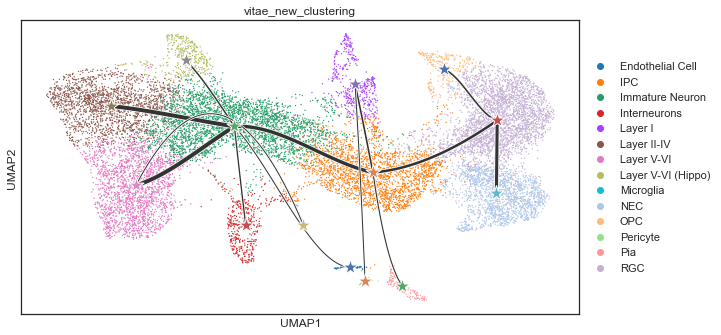

In [30]:
model.infer_backbone(cutoff = 0, no_loop = True, visualize = True,method = "raw_map")

In [31]:
a = list(model.backbone.edges(data = True))
a = [x[2]["weight"] for x in a]
a = np.sort(a)[-8] - 1e-10

'vitae_new_clustering' updated based on the projected cell positions.
Cell projection uncertainties stored as 'projection_uncertainty' in self.adata.obs


D:\Anaconda_new\envs\bio\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\10270\Desktop\硕一上\Wang\Trajectory\Dev\GitVersion\VITAE\VITAE\VITAE.py:705: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.ax.figure.show()


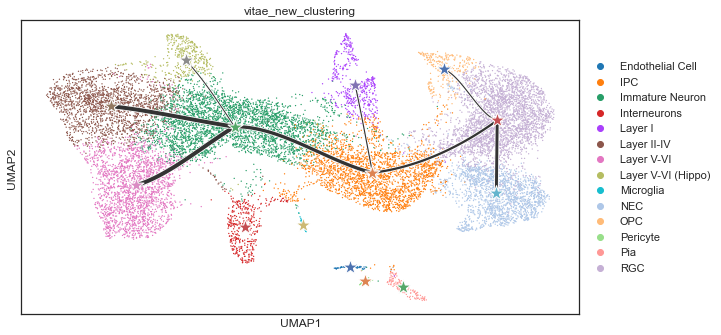

In [32]:
model.infer_backbone(cutoff = a, no_loop = True, visualize = True,method = "raw_map")

Cell projection uncertainties stored as 'pseudotime' in self.adata.obs


C:\Users\10270\Desktop\硕一上\Wang\Trajectory\Dev\GitVersion\VITAE\VITAE\VITAE.py:874: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.ax.figure.show()


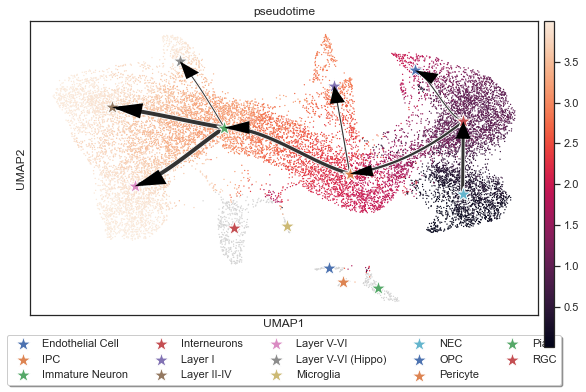

In [33]:
model.infer_trajectory("NEC")